<img src = "https://rec-data.kalibrr.com/www.kalibrr.ph/logos/SSYTB3EN2CEV9HZDWPPE4JHP8X2T7CNC6SDZST8Y-5d0b4f4b.png" width = 600>

# A. Introduction

**Kelompok 03 - Final Project 4 (Clustering)**<br>

Anggota Kelompok:

1. Taufik Aji Putra<br>
PYTN-KS05-003

2. Ari Sandy Kurniawan<br>
PYTN-KS05-005

3. Muhammad Rizaldi<br>
PYTN-KS05-009

## Project Overview

Dataset yang digunakan pada projek ini adalah dataset publik yang tersedia di website kaggle (https://www.kaggle.com/arjunbhasin2013/ccdata). Dataset ini berisi perilaku belanja dan data tidak berlabel yang berkaitan dengan transaksi kartu kredit. Tujuan utama dari penelitian ini adalah untuk menunjukkan segmentasi pelanggan yang paling sesuai dengan dataset ini dengan mengimplementasikan analisa clustering.Algoritma dan metode yang digunakan pada projek ini yaitu algoritma K-Means Clustering, pemilihan algoritma K-means clustering dikarenakan algoritma tersebut lebih efisien dalam menangani dataset yang besar, algoritma sederhana yang mudah untuk dimengerti dan diterapkan. Selain K-means, terdapat teknik lain yang akan digunakan yaitu Principal Component Analysis (PCA) sebagai reduction dimension dataset dengan mengidentifikasi pola untuk mengurangi dimensi dataset. Penggunaan metode PCA juga dapat membantu mengoptimalkan hasil cluster dari K-means clustering dengan mendeteksi cluster tambahan dibandingkan dengan jumlah optimal cluster pada K-means tanpa menggunakan PCA.   Dataset ini memiliki dimensi yang tinggi dan variabel-variabel yang berkorelasi. Data ini berisi transaksi pengguna kartu kredit sebanyak 8950 transaksi selama 6 bulan, dataset kartu kredit ini memiliki 18 atribut. Berikut deskripsi dari dataset ini, yaitu :

Attribute Information:
1. CUSTID - Identification of Credit Card holder (Categorical)
2. BALANCE - Balance amount left in their account to make purchases (
3. BALANCEFREQUENCY - How frequently the Balance is updated, score between 0
and 1 (1 = frequently updated, 0 = not frequently updated)
4. PURCHASES - Amount of purchases made from account
5. ONEOFFPURCHASES - Maximum purchase amount done in one-go
6. INSTALLMENTSPURCHASES - Amount of purchase done in installment
7. CASHADVANCE - Cash in advance given by the user
8. PURCHASESFREQUENCY - How frequently the Purchases are being made, score
between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
9. ONEOFFPURCHASESFREQUENCY - How frequently Purchases are happening in
one-go (1 = frequently purchased, 0 = not frequently purchased)
10. PURCHASESINSTALLMENTSFREQUENCY - How frequently purchases in
installments are being done (1 = frequently done, 0 = not frequently done)
11. CASHADVANCEFREQUENCY - How frequently the cash in advance being paid
12. CASHADVANCETRX - Number of Transactions made with "Cash in Advance"
13. PURCHASESTRX - Number of purchase transactions made
14. CREDITLIMIT - Limit of Credit Card for user
15. PAYMENTS - Amount of Payment done by user
16. MINIMUM_PAYMENTS - Minimum amount of payments made by user
17. PRCFULLPAYMENT - Percent of full payment paid by user
18. TENURE - Tenure of credit card service for user

# B. Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
import folium


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import svm
import sklearn.metrics as metrics

from scipy.stats import skew

from time import time
from six import StringIO
from sklearn import tree
import sklearn.tree as tree
from IPython.display import Image
import pydotplus
import joblib
import pickle

from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

import warnings
warnings.filterwarnings('ignore')

from IPython.display import Image
plt.style.use("ggplot")

# C. Load Dataset

In [ ]:
import os
os.environ['KAGGLE_USERNAME'] = 'taufikajip'
os.environ['KAGGLE_KEY'] = '7f1ea81999ae0bff7b14bd8c95f733e3'

In [ ]:
! kaggle datasets download -d arjunbhasin2013/ccdata

ccdata.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
# Ekstrak File berbentuk ZIP
from zipfile import ZipFile

file_name = "/content/ccdata.zip"

with ZipFile(file_name, 'r') as zip : 
  zip.extractall()
  print('Ekstrak File Berhasil')

Ekstrak File Berhasil


**Melihat dataset yang sudah diimport**

In [ ]:
data = pd.read_csv('CC GENERAL.csv')
data

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [ ]:
df = data.copy()
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


Melihat dimensi dari dataset

In [ ]:
df.shape

(8950, 18)

Menampilkan informasi dataset mengenai columns, data type, dan missing value

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


Pada informasi tabel dataset diatas dijabarkan mengenai beberapa hal pada setiap variabel
1. **BALANCE**\
Rata-rata jumlah saldo yang tersisa pada akun customer adalah 1564.474828, dengan nilai minimum 0, dan nilai maksimum 19043.13856.
2. **PURCHASES**\
Rata-rata jumlah saldo pembelian yang dilakukan customer adalah 1003.204834, dengan nilai minimum 0, dan nilai maksimum 49039.57000.
3. **ONEOFF_PURCHASES**\
Rata-rata jumlah saldo yang dikeluarkan customer dalam sekali transaksi adalah 0.202458, dengan nilai minimum 0, dan nilai maksimum 1.000000.
4. **INSTALLMENTS_PURCHASES**\
Rata-rata jumlah pembelian yang dilakukan secara angsuran oleh customer adalah 411.067645	, dengan nilai minimum 0, dan nilai maksimum 22500.00000.
5. **CASH_ADVANCE**\
Rata-rata jumlah uang muka yang diberikan oleh customer adalah 978.871112	, dengan nilai minimum 0, dan nilai maksimum 47137.21176.

dan seterusnya.

# D. Data Cleaning

> Memeriksa jumlah missing value dan menanganinya pada dataset.

In [ ]:
df.isnull().sum().sort_values(ascending=False)

MINIMUM_PAYMENTS                    313
CREDIT_LIMIT                          1
CUST_ID                               0
BALANCE                               0
PRC_FULL_PAYMENT                      0
PAYMENTS                              0
PURCHASES_TRX                         0
CASH_ADVANCE_TRX                      0
CASH_ADVANCE_FREQUENCY                0
PURCHASES_INSTALLMENTS_FREQUENCY      0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_FREQUENCY                   0
CASH_ADVANCE                          0
INSTALLMENTS_PURCHASES                0
ONEOFF_PURCHASES                      0
PURCHASES                             0
BALANCE_FREQUENCY                     0
TENURE                                0
dtype: int64

Terdapat missing value pada kolom CREDIT_LIMIT sebesar 1  dan MINIMUM_PAYMENTS sebesar 313 untuk 2 kolom tersebut akan dilakukan pengisian missing value menggunakan metode mean.

In [ ]:
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean(),inplace=True)
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean(),inplace=True)

In [ ]:
df.isnull().sum().sum()

0

> Cek keberadaan duplikasi data

In [ ]:
dup = df.duplicated()
dup.sum()

0

Hasilnya missing value serta duplikasi pada dataset sudah tidak ditemukan.

> Cek unique value berdasarkan kolom pada dataset

In [ ]:
unique_val = df.nunique().sort_values(ascending=False)
unique_val = pd.DataFrame(unique_val, columns = ["Count"])
unique_val

,Count
CUST_ID,8950
BALANCE,8871
PAYMENTS,8711
MINIMUM_PAYMENTS,8637
PURCHASES,6203
INSTALLMENTS_PURCHASES,4452
CASH_ADVANCE,4323
ONEOFF_PURCHASES,4014
CREDIT_LIMIT,206
PURCHASES_TRX,173


In [ ]:
for val in df.columns:
    print(val,': ')
    print(df[val].value_counts())
    print("  ")

CUST_ID : 
C10001    1
C16135    1
C16129    1
C16130    1
C16131    1
         ..
C13065    1
C13064    1
C13063    1
C13062    1
C19190    1
Name: CUST_ID, Length: 8950, dtype: int64
  
BALANCE : 
0.000000       80
40.900749       1
1213.551338     1
1253.188317     1
5058.299635     1
               ..
8791.161142     1
2320.402196     1
7215.745096     1
1013.233120     1
372.708075      1
Name: BALANCE, Length: 8871, dtype: int64
  
BALANCE_FREQUENCY : 
1.000000    6211
0.909091     410
0.818182     278
0.727273     223
0.545455     219
0.636364     209
0.454545     172
0.363636     170
0.272727     151
0.181818     146
0.000000      80
0.090909      67
0.833333      60
0.875000      57
0.900000      55
0.888889      53
0.857143      51
0.500000      40
0.666667      37
0.333333      22
0.777778      22
0.800000      20
0.571429      19
0.750000      17
0.714286      15
0.700000      13
0.625000      11
0.555556      10
0.400000      10
0.375000       9
0.125000       9
0.200000  

# E. Eksplorasi Data

> Cek distribusi masing-masing kolom pada dataset.

In [ ]:
obj_cols = df.select_dtypes(include=['object']).columns.tolist()
num_cols = df.select_dtypes(exclude=['object']).columns.tolist()

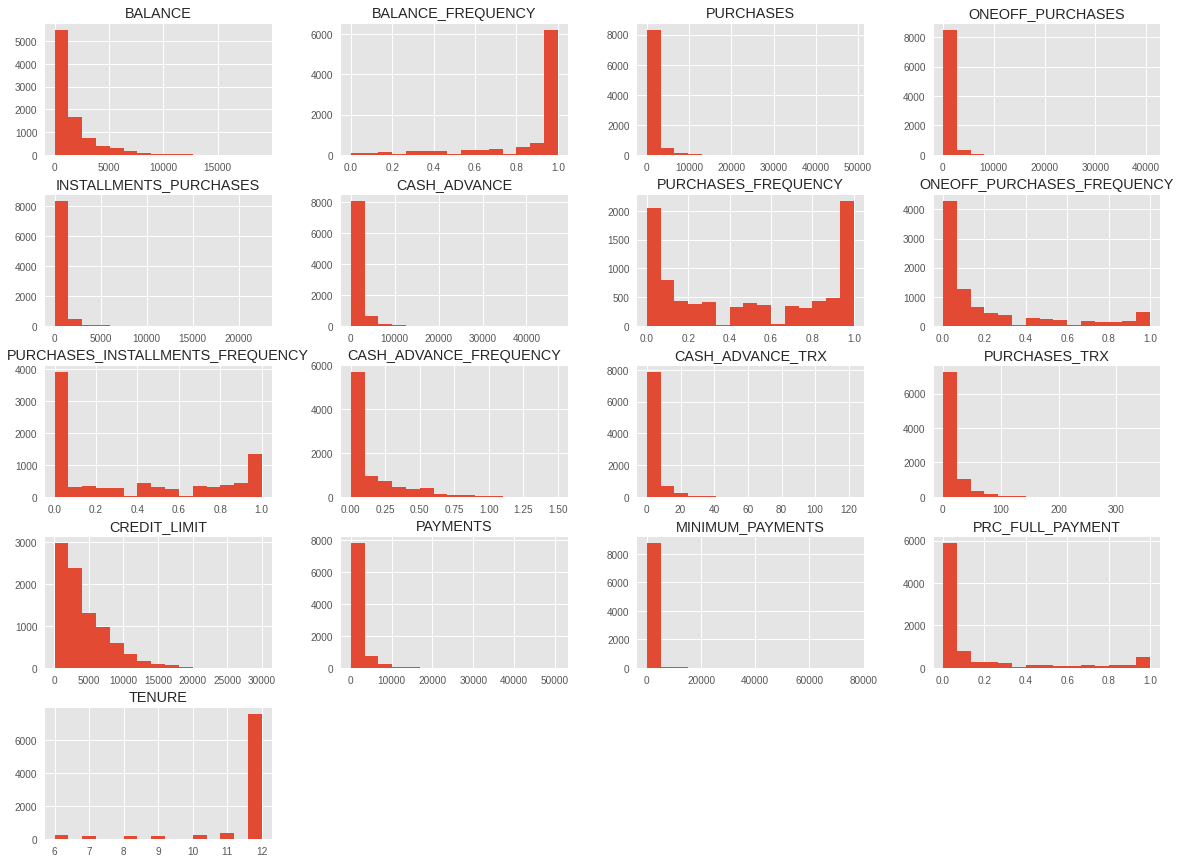

In [ ]:
df[num_cols].hist(bins=15, figsize=(20, 15), layout=(5, 4));

Visualisasi histogram pada tiap kolomnya diatas terdapat beberapa informasi yang didapatkan yaitu rata-rata atau kebanyakan jumlah paling banyak adalah nilai minimum yang dimiliki oleh setiap variabel adalah 0.

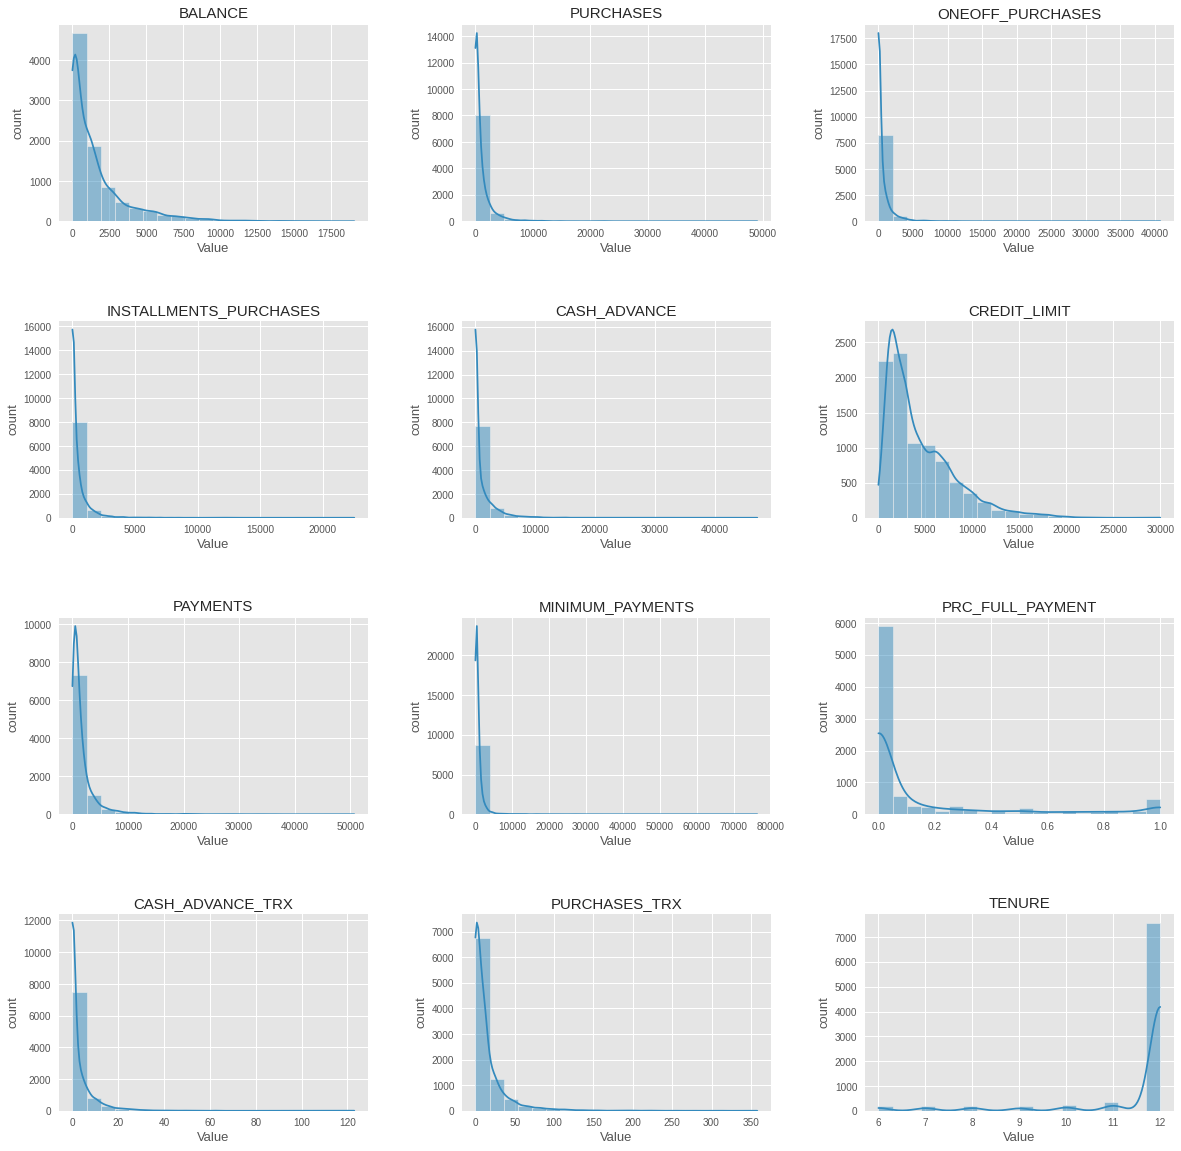

In [ ]:
var_col = ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES', 'CASH_ADVANCE','CREDIT_LIMIT',
           'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT','CASH_ADVANCE_TRX', 'PURCHASES_TRX','TENURE']
intr_cols = ['balance', 'purchases', 'oneoff_purchases', 'installments_purchases', 'balance_frequency', 'purchases_frequency', 
             'oneoff_purchases_frequency', 'purchases_installments_frequency']
plt.figure(figsize=(20,20))
for i, col in enumerate(var_col):
    plt.subplot(4,3,i+1)
    plt.title(col, fontsize=15)
    plt.xlabel("Value", fontsize=13)
    plt.ylabel("count", fontsize=13)
    plt.subplots_adjust(hspace=0.5, wspace=0.3)
    sns.histplot(data=df, x=col, bins=20, kde=True)

Semua fitur diatas terlihat memiliki distribusi yang tidak normal, distribusi data tersebut mengalami skewness

> Kolerasi masing-masing variable

In [ ]:
df.corr()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.322412,0.181261,0.164350,0.126469,0.496692,-0.077944,0.073166,-0.063186,0.449218,0.385152,0.154338,0.531267,0.322802,0.394282,-0.318959,0.072692
BALANCE_FREQUENCY,0.322412,1.000000,0.133674,0.104323,0.124292,0.099388,0.229715,0.202415,0.176079,0.191873,0.141555,0.189626,0.095795,0.065008,0.114249,-0.095082,0.119776
PURCHASES,0.181261,0.133674,1.000000,0.916845,0.679896,-0.051474,0.393017,0.498430,0.315567,-0.120143,-0.067175,0.689561,0.356959,0.603264,0.093515,0.180379,0.086288
ONEOFF_PURCHASES,0.164350,0.104323,0.916845,1.000000,0.330622,-0.031326,0.264937,0.524891,0.127729,-0.082628,-0.046212,0.545523,0.319721,0.567292,0.048597,0.132763,0.064150
INSTALLMENTS_PURCHASES,0.126469,0.124292,0.679896,0.330622,1.000000,-0.064244,0.442418,0.214042,0.511351,-0.132318,-0.073999,0.628108,0.256496,0.384084,0.131687,0.182569,0.086143
CASH_ADVANCE,0.496692,0.099388,-0.051474,-0.031326,-0.064244,1.000000,-0.215507,-0.086754,-0.177070,0.628522,0.656498,-0.075850,0.303983,0.453238,0.139223,-0.152935,-0.068312
PURCHASES_FREQUENCY,-0.077944,0.229715,0.393017,0.264937,0.442418,-0.215507,1.000000,0.501343,0.862934,-0.308478,-0.203478,0.568430,0.119778,0.103464,0.002976,0.305802,0.061506
ONEOFF_PURCHASES_FREQUENCY,0.073166,0.202415,0.498430,0.524891,0.214042,-0.086754,0.501343,1.000000,0.142329,-0.111716,-0.069088,0.544869,0.295030,0.243537,-0.029963,0.157531,0.082466
PURCHASES_INSTALLMENTS_FREQUENCY,-0.063186,0.176079,0.315567,0.127729,0.511351,-0.177070,0.862934,0.142329,1.000000,-0.262958,-0.169207,0.529975,0.060752,0.085551,0.029590,0.250087,0.073275
CASH_ADVANCE_FREQUENCY,0.449218,0.191873,-0.120143,-0.082628,-0.132318,0.628522,-0.308478,-0.111716,-0.262958,1.000000,0.799561,-0.131168,0.132616,0.183192,0.097898,-0.249773,-0.133372


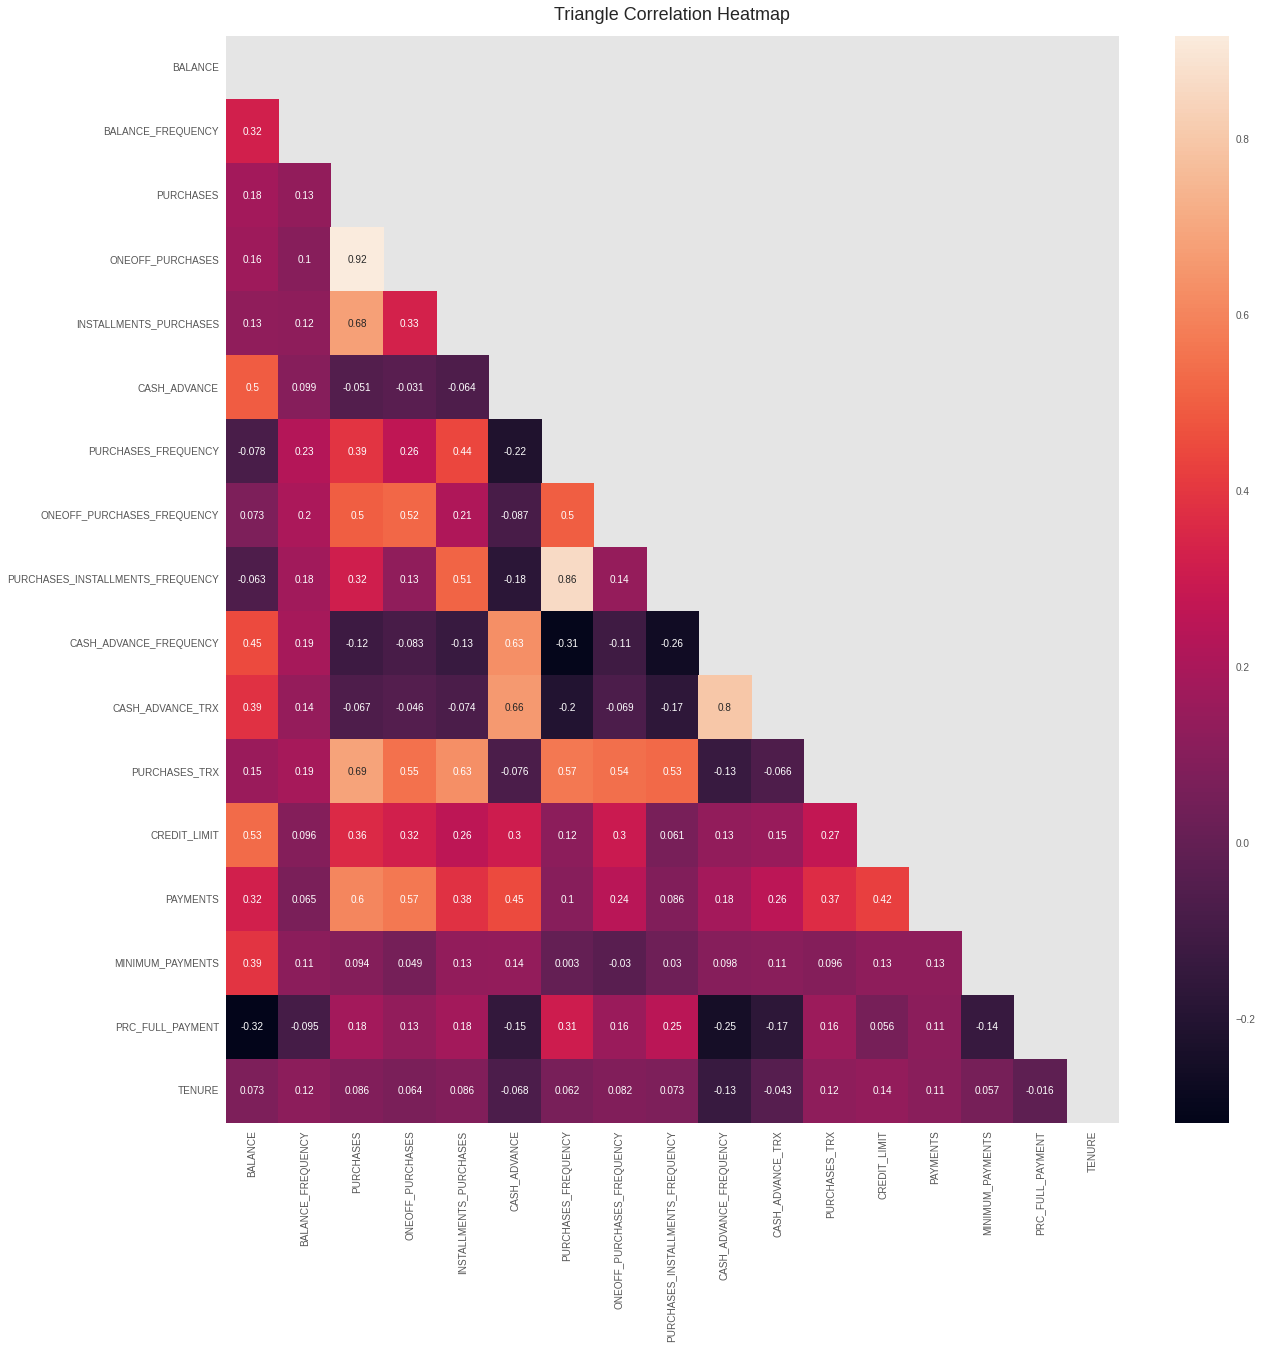

In [ ]:
plt.figure(figsize=(20, 20))
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
heatmap = sns.heatmap(df.corr(), annot=True, mask=mask)
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

Variabel-variabel yang berkorelasi tinggi tidak berguna untuk algoritma segmentasi karena mereka merepresentasikan karakteristik yang sama dari sebuah segmen. 

Variabel atau fitur yang memiliki korelasi tinggi yaitu PURCHASES dan ONEOFF_PURCHASES dengan skor 0.92, PURCHASES_FREQUENCY dan PURCHASES_INSTALLMENTS_FREQUENCY dengan skor 0.86, CASH_ADVANCE_FREQUENCY dan CASH_ADVANCE_TRX dengan skor 0.8. 

Untuk menangani hal ini, tidak dianjurkan untuk membuang fitur, maka akan digunakan metode PCA yang mana dapat membantu mempertahankan informasi dan diwaktu yang sama bisa didapatkan variabel independent

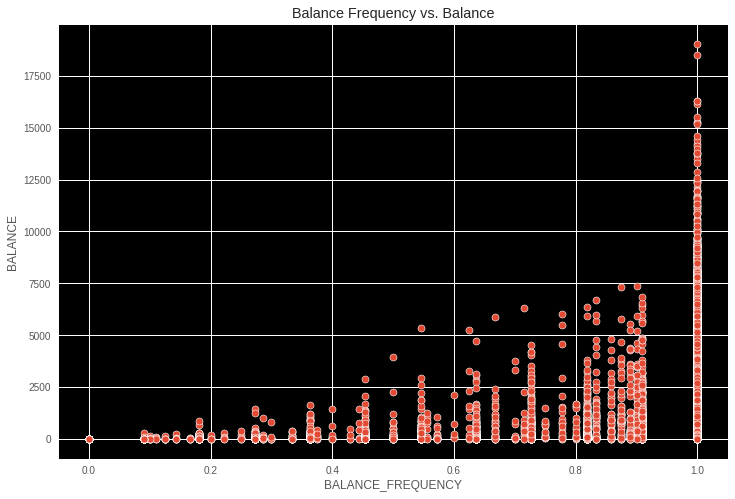

In [ ]:
# membandingkan balance frequency dan balance
plt.figure(figsize=(12,8))
ax = plt.axes() 
ax.set_facecolor('black') 
g = sns.scatterplot(x='BALANCE_FREQUENCY', y='BALANCE', data=data)
g.set_title('Balance Frequency vs. Balance')
plt.show()

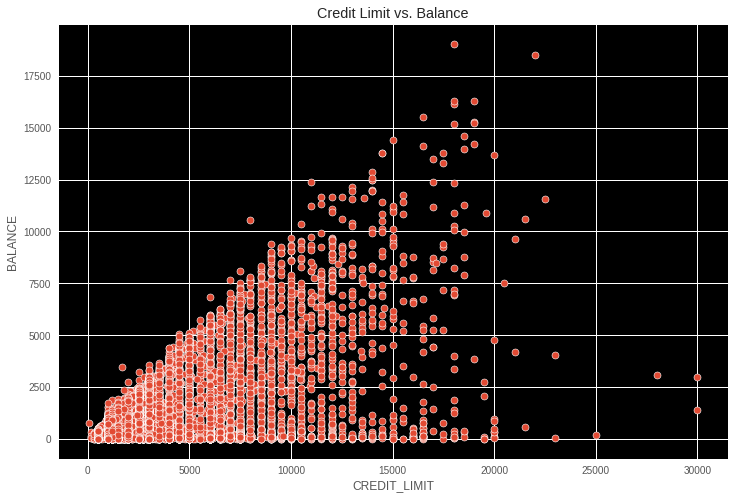

In [ ]:
#membandingkan credit limit dan balance
plt.figure(figsize=(12,8))
ax = plt.axes() 
ax.set_facecolor('black') 
g = sns.scatterplot(x='CREDIT_LIMIT', y='BALANCE', data=data)
g.set_title('Credit Limit vs. Balance')
plt.show()

Dapat terlihat korelasi antar batas pada credit limit dan balance, semakin besar credit_limit maka umumnya akan menghabiskan atau mengeluarkan balance lebih banyak

# F. Data Preprocessing

## Drop Column

In [ ]:
#drop cust_id karena tidak dibutuhkan untuk analisis
df.drop(columns='CUST_ID', inplace=True)

In [ ]:
#drop na values
df.dropna(axis='index', inplace=True)
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## Handling Outlier

In [ ]:
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

> Mengecek keberadaan outlier dengan hanya menampilkan variabel kontinu menggunakan box plot

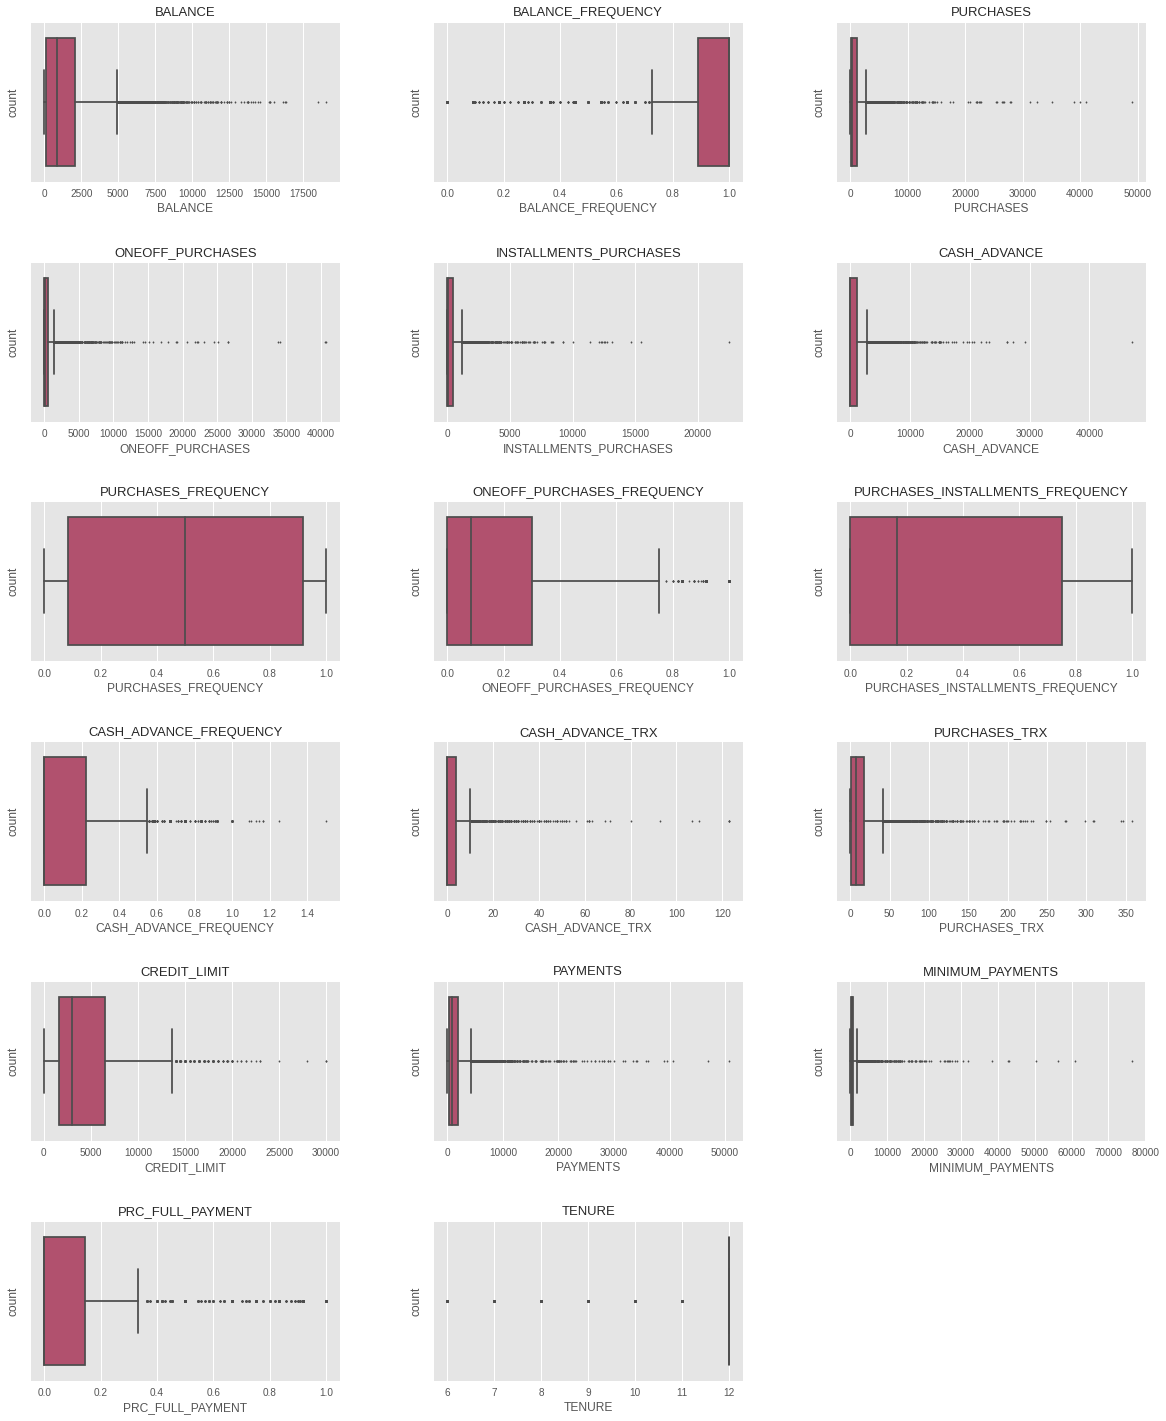

In [ ]:
num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
plt.figure(figsize =(20,25))
for i, col in enumerate(num_cols):
    plt.subplot(6,3,i+1)
    plt.title(col, fontsize=13)
    plt.xlabel(f"skew of {col}:{skew(df[col])}")
    plt.ylabel("count",fontsize=12)
    plt.subplots_adjust(hspace=0.5, wspace=0.3)
    sns.boxplot(data=df, x=col, palette='flare', fliersize=1)

Berdasarkan visualisasi box plot diatas, terdapat beberapa kolom yang memiliki outlier. Untuk meminimalisir tejadinya outlier, maka akan dilakukan teknik untuk menghandling outlier pada kolom tersebut. Cara yang dilakukan adalah kita menghapus nilai outliernya berdasarkan range nilai tertentu. Untuk lebih jelasnya bisa liat komentar pada setiap code

In [ ]:
num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
def RemoveOutliers(num_cols):
    for col in num_cols:
        iqr = df[col].quantile(0.75)-df[col].quantile(0.25)
        lower_threshold = df[col].quantile(0.25)-(iqr*1.5)
        upper_threshold = df[col].quantile(0.75)+(iqr*1.5)
        print(f"Rentang nilai outlier pada fitur {col} : <{round(lower_threshold,2)} atau >{round(upper_threshold,2)}")
        df.loc[(df[col]<=lower_threshold),col] = lower_threshold
        df.loc[(df[col]>=upper_threshold),col] = upper_threshold
RemoveOutliers(num_cols)

Rentang nilai outlier pada fitur BALANCE : <-2760.51 atau >4942.93
Rentang nilai outlier pada fitur BALANCE_FREQUENCY : <0.72 atau >1.17
Rentang nilai outlier pada fitur PURCHASES : <-1566.11 atau >2715.87
Rentang nilai outlier pada fitur ONEOFF_PURCHASES : <-866.11 atau >1443.51
Rentang nilai outlier pada fitur INSTALLMENTS_PURCHASES : <-702.96 atau >1171.59
Rentang nilai outlier pada fitur CASH_ADVANCE : <-1670.73 atau >2784.55
Rentang nilai outlier pada fitur PURCHASES_FREQUENCY : <-1.17 atau >2.17
Rentang nilai outlier pada fitur ONEOFF_PURCHASES_FREQUENCY : <-0.45 atau >0.75
Rentang nilai outlier pada fitur PURCHASES_INSTALLMENTS_FREQUENCY : <-1.12 atau >1.88
Rentang nilai outlier pada fitur CASH_ADVANCE_FREQUENCY : <-0.33 atau >0.56
Rentang nilai outlier pada fitur CASH_ADVANCE_TRX : <-6.0 atau >10.0
Rentang nilai outlier pada fitur PURCHASES_TRX : <-23.0 atau >41.0
Rentang nilai outlier pada fitur CREDIT_LIMIT : <-5750.0 atau >13850.0
Rentang nilai outlier pada fitur PAYMENTS : 

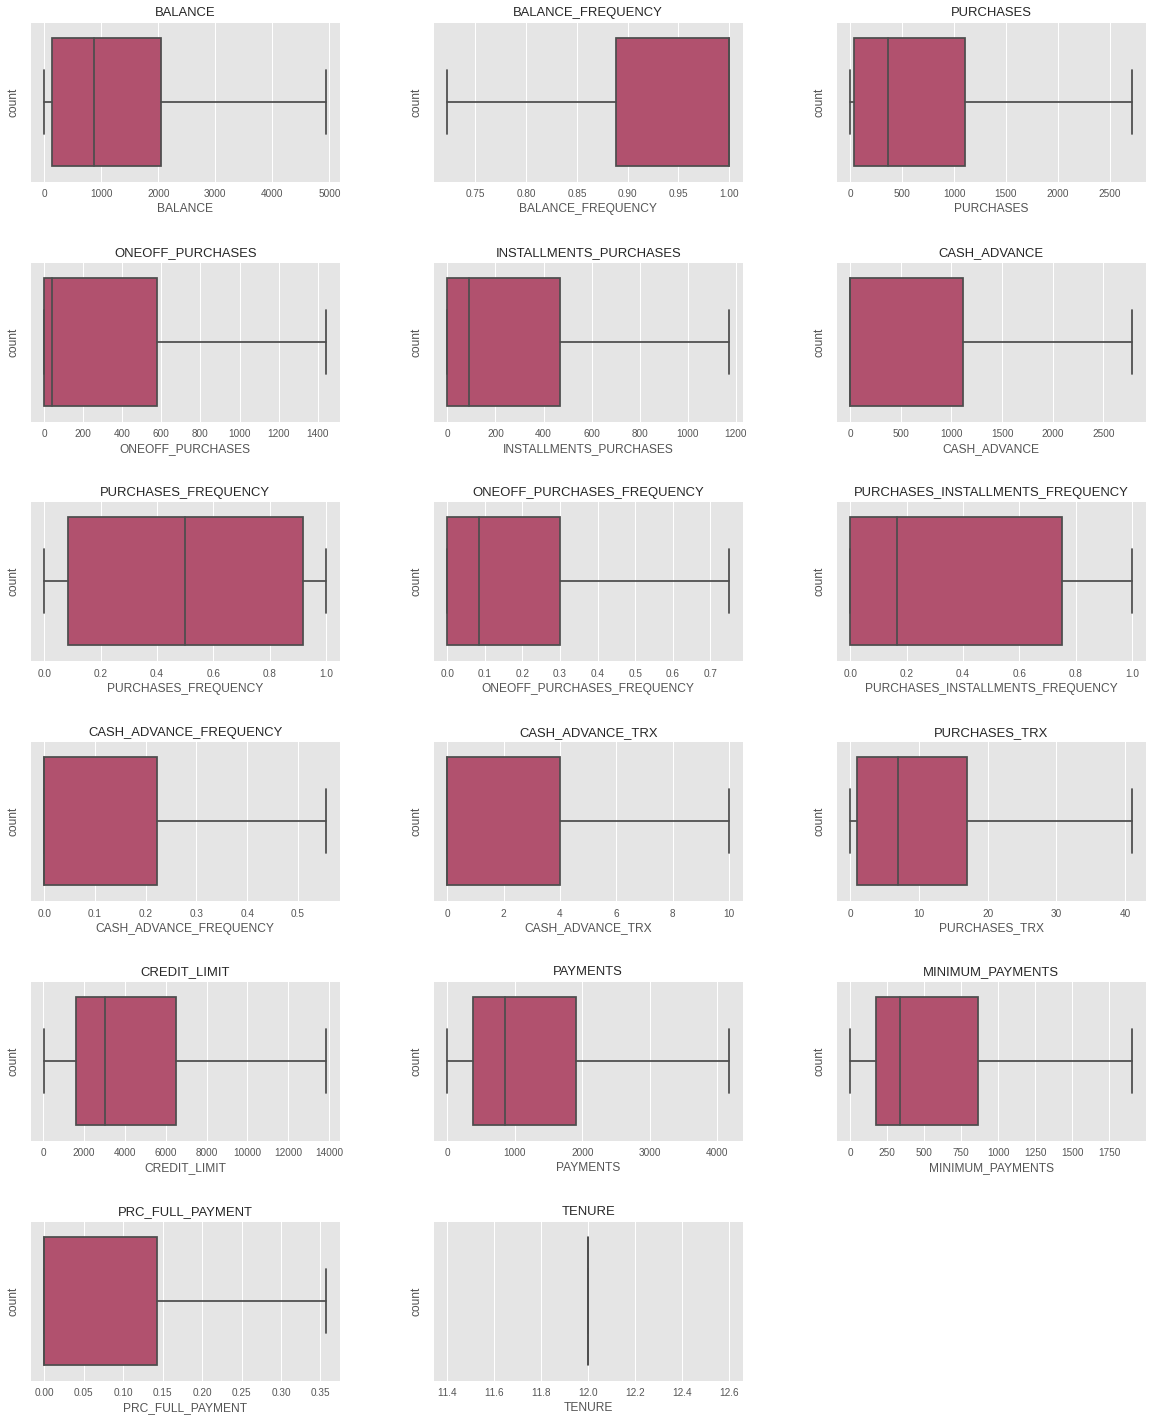

In [ ]:
num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
plt.figure(figsize =(20,25))
for i, col in enumerate(num_cols):
    plt.subplot(6,3,i+1)
    plt.title(col, fontsize=13)
    plt.xlabel(f"skew of {col}:{skew(df[col])}")
    plt.ylabel("count",fontsize=12)
    plt.subplots_adjust(hspace=0.5, wspace=0.3)
    sns.boxplot(data=df, x=col, palette='flare', fliersize=1)

## Scaling data
> Pada projek ini digunakan 3 teknik data scaler yaitu MinMax Scaler, Robust Scaler dan Standard Scaler untuk dibandingkan hasilnya dan akan dipilih teknik yang menghasilkan score paling optimal


In [ ]:
'''
MM_scaler_df = pd.DataFrame(MinMaxScaler().fit_transform(df), columns=df.columns)
RB_scaler_df = pd.DataFrame(RobustScaler().fit_transform(df), columns=df.columns)
SS_scaler_df = pd.DataFrame(StandardScaler().fit_transform(df), columns=df.columns)
'''

'\nMM_scaler_df = pd.DataFrame(MinMaxScaler().fit_transform(df), columns=df.columns)\nRB_scaler_df = pd.DataFrame(RobustScaler().fit_transform(df), columns=df.columns)\nSS_scaler_df = pd.DataFrame(StandardScaler().fit_transform(df), columns=df.columns)\n'

In [ ]:
MM_scaler = MinMaxScaler().fit_transform(df)
RB_scaler = RobustScaler().fit_transform(df)
SS_scaler = StandardScaler().fit_transform(df)

In [ ]:
MM_scaler_df = pd.DataFrame(MinMaxScaler().fit_transform(df), columns=df.columns)
RB_scaler_df = pd.DataFrame(RobustScaler().fit_transform(df), columns=df.columns)
SS_scaler_df = pd.DataFrame(StandardScaler().fit_transform(df), columns=df.columns)

In [ ]:
#MM_scaler.describe().T

In [ ]:
#RB_scaler.describe().T

In [ ]:
#SS_scaler.describe().T

## PCA

set parameter n_components = 0.9, yang berarti bahwa PCA secara otomatis akan menghasilkan cukup banyak principal component yang akan mempertahankan 90% varians dalam dataset.

In [ ]:
pca = PCA(n_components=0.9, random_state=42)

### MinMax Scaler

In [ ]:
pca_MM = pca.fit(MM_scaler)
pc_MM = ['PC'+str(n) for n in range(1, len(pca_MM.components_)+1)]
df_pca_MM = pd.DataFrame(pca_MM.transform(MM_scaler), columns=pc_MM)

In [ ]:
df_pca_MM.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,-0.567426,-0.799214,0.092197,-0.193155,0.235616,0.131605,0.141062
1,-0.863218,0.566302,0.143363,0.693987,-0.022078,-0.656108,0.028735
2,0.380546,0.131972,0.542734,-0.710332,-0.153240,0.051592,-0.557826
3,-0.302466,-0.198427,0.878657,-0.142463,0.680382,0.081916,-0.088868
4,-0.585802,-0.476283,0.047954,-0.534955,-0.202541,-0.135136,0.219951


In [ ]:
pca_MM.components_

array([[-0.05795968,  0.09277862,  0.33452214,  0.27284437,  0.32469323,
        -0.19717155,  0.44315135,  0.26218017,  0.38202943, -0.18218578,
        -0.19377806,  0.34819813,  0.05929171,  0.11253941, -0.04283834,
         0.19056245, -0.        ],
       [ 0.39776279,  0.31386667,  0.15334761,  0.1818774 ,  0.07129899,
         0.38533254,  0.02054922,  0.15590236, -0.00674613,  0.32700193,
         0.36952653,  0.12526815,  0.18176095,  0.26051863,  0.3217149 ,
        -0.21156525, -0.        ],
       [-0.05793123, -0.27368119,  0.20304981,  0.49822343, -0.25336062,
        -0.05045463, -0.23339207,  0.43545923, -0.50043129, -0.06535795,
        -0.07843368, -0.00432171,  0.11101567,  0.16754367, -0.11899444,
         0.07761576, -0.        ],
       [-0.125996  , -0.47078656,  0.01742558, -0.10424023,  0.1432931 ,
         0.33991107,  0.02139182, -0.12272285,  0.11058374,  0.22976097,
         0.27931283,  0.0024553 ,  0.08056071,  0.26729153, -0.13520533,
         0.60039035

In [ ]:
pca_MM.explained_variance_ratio_

array([0.35254326, 0.22779253, 0.10632398, 0.08990088, 0.05804412,
       0.04600907, 0.02979274])

In [ ]:
sum(pca_MM.explained_variance_ratio_)

0.9104065815154075

In [ ]:
data_pca_MM = pd.DataFrame(pca_MM.components_,
                           columns = df.columns.values,
                           index = ['Component 1', 'Component 2', 'Component 3', 'Component 4', 'Component 5', 'Component 6', 'Component 7'])
data_pca_MM

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
Component 1,-0.057960,0.092779,0.334522,0.272844,0.324693,-0.197172,0.443151,0.262180,0.382029,-0.182186,-0.193778,0.348198,0.059292,0.112539,-0.042838,0.190562,-0.0
Component 2,0.397763,0.313867,0.153348,0.181877,0.071299,0.385333,0.020549,0.155902,-0.006746,0.327002,0.369527,0.125268,0.181761,0.260519,0.321715,-0.211565,-0.0
Component 3,-0.057931,-0.273681,0.203050,0.498223,-0.253361,-0.050455,-0.233392,0.435459,-0.500431,-0.065358,-0.078434,-0.004322,0.111016,0.167544,-0.118994,0.077616,-0.0
Component 4,-0.125996,-0.470787,0.017426,-0.104240,0.143293,0.339911,0.021392,-0.122723,0.110584,0.229761,0.279313,0.002455,0.080561,0.267292,-0.135205,0.600390,0.0
Component 5,0.200196,-0.691445,0.099055,-0.013838,0.206379,-0.003584,-0.043574,-0.159811,0.121883,-0.163474,-0.157106,0.044006,0.155850,0.079701,0.304279,-0.458644,0.0
Component 6,-0.290890,-0.242139,0.009368,0.131708,-0.050054,0.118534,0.214743,0.208480,0.130684,0.305687,0.332701,0.144480,-0.325425,-0.320979,-0.313336,-0.428937,0.0
Component 7,-0.251721,0.191398,0.284123,0.045818,0.416429,-0.053647,-0.390555,-0.294641,-0.069502,0.027280,0.002332,-0.012528,-0.229266,0.432352,-0.307849,-0.248077,0.0


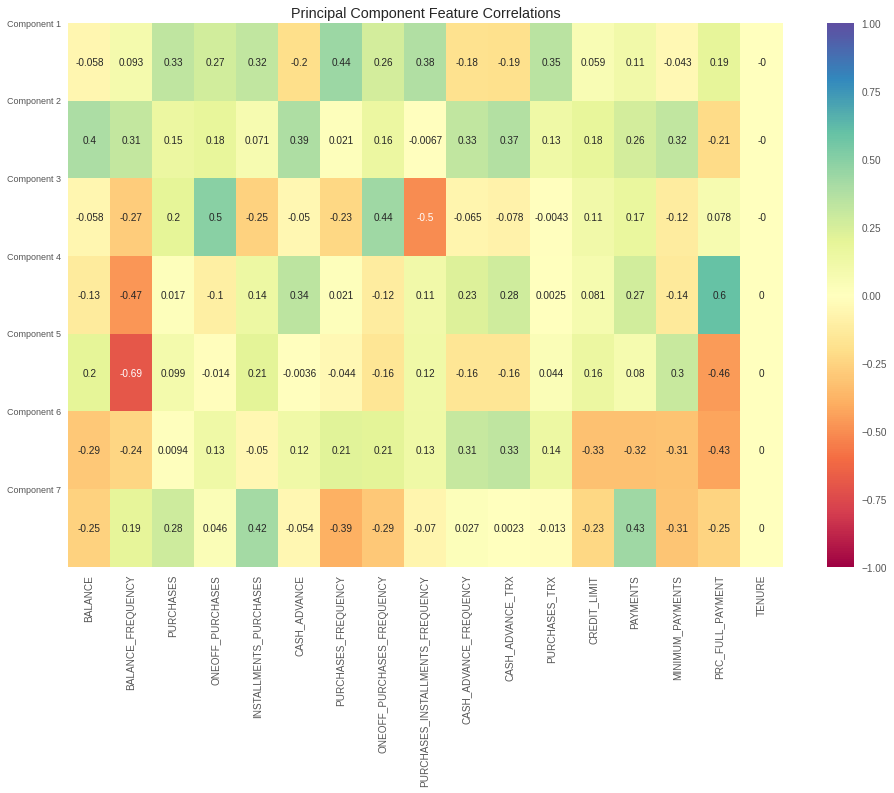

In [ ]:
#Kita dapat membuat heatmap lain untuk membuat grafik komponen:

plt.figure(figsize=(16,10))
sns.heatmap(data_pca_MM, vmin=-1, vmax=1, cmap='Spectral', annot=True)
plt.title('Principal Component Feature Correlations')
plt.yticks([0, 1, 2, 3, 4, 5, 6], ['Component 1', 'Component 2', 'Component 3', 'Component 4', 'Component 5', 'Component 6', 'Component 7'],rotation=0, fontsize=9)
plt.show()

In [ ]:
pca_MM_scores = pca.transform(MM_scaler)
pca_MM_scores

array([[-0.56742635, -0.79921381,  0.09219745, ...,  0.23561582,
         0.13160518,  0.1410618 ],
       [-0.86321815,  0.56630159,  0.14336322, ..., -0.02207765,
        -0.65610778,  0.02873506],
       [ 0.38054563,  0.13197182,  0.54273387, ..., -0.15324005,
         0.05159156, -0.55782614],
       ...,
       [ 0.1326487 , -0.92408115, -0.32422214, ..., -0.07959244,
         0.06586774, -0.30379136],
       [-0.68980417, -0.80554148,  0.18550221, ..., -0.25197404,
        -0.0333834 ,  0.02119903],
       [ 0.14209021, -0.20605694,  0.9073331 , ...,  0.2073284 ,
         0.92851601, -0.28958015]])

### Robust Scaler

In [ ]:
pca_RB = pca.fit(RB_scaler)
pc_RB = ['PC'+str(n) for n in range(1, len(pca_RB.components_)+1)]
df_pca_RB = pd.DataFrame(pca_RB.transform(RB_scaler), columns=pc_RB)

In [ ]:
df_pca_RB.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,-1.187617,-2.014674,-0.323135,0.510587,0.464878,0.449171,-0.301362
1,-1.571687,1.658576,1.836355,-0.509673,0.344103,-1.565992,-0.695978
2,1.005378,0.266429,-1.181414,1.743625,-0.397810,-0.637560,0.757109
3,-0.018218,-0.442847,0.397687,2.244531,1.421976,0.200090,0.663787
4,-1.067349,-1.206658,-1.188223,0.339067,-0.470512,-0.356718,-0.635820


In [ ]:
pca_RB.components_

array([[-0.05533925,  0.09209164,  0.4089739 ,  0.3669612 ,  0.33544812,
        -0.21680599,  0.20966811,  0.34082963,  0.18303177, -0.20343506,
        -0.21784797,  0.39383384,  0.09931446,  0.17724985, -0.05341357,
         0.21283218, -0.        ],
       [ 0.40522376,  0.29290956,  0.13443464,  0.15972395,  0.05631492,
         0.3832534 , -0.0013074 ,  0.13339716, -0.01221805,  0.32180296,
         0.36375178,  0.1062442 ,  0.20378073,  0.28065289,  0.35520697,
        -0.21163173, -0.        ],
       [-0.1437253 , -0.55650269,  0.04887665,  0.06384599, -0.01514914,
         0.31054035, -0.05287404,  0.02675798, -0.0678906 ,  0.20054755,
         0.24101639, -0.0435987 ,  0.1267188 ,  0.33107547, -0.19627612,
         0.54221302,  0.        ],
       [ 0.00614805, -0.2698286 ,  0.06071596,  0.47261265, -0.47350311,
        -0.08204525, -0.15741541,  0.42504266, -0.33197371, -0.0662461 ,
        -0.08851752, -0.11863161,  0.06130699, -0.02841081, -0.0601726 ,
        -0.34501844

In [ ]:
pca_RB.explained_variance_ratio_

array([0.30720198, 0.26432473, 0.10286985, 0.08458991, 0.06519567,
       0.0502931 , 0.03190456])

In [ ]:
sum(pca_RB.explained_variance_ratio_)

0.9063797994314451

In [ ]:
data_pca_RB = pd.DataFrame(pca_RB.components_,
                           columns = df.columns.values,
                           index = ['Component 1', 'Component 2', 'Component 3', 'Component 4', 'Component 5', 'Component 6', 'Component 7'])
data_pca_RB

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
Component 1,-0.055339,0.092092,0.408974,0.366961,0.335448,-0.216806,0.209668,0.340830,0.183032,-0.203435,-0.217848,0.393834,0.099314,0.177250,-0.053414,0.212832,-0.0
Component 2,0.405224,0.292910,0.134435,0.159724,0.056315,0.383253,-0.001307,0.133397,-0.012218,0.321803,0.363752,0.106244,0.203781,0.280653,0.355207,-0.211632,-0.0
Component 3,-0.143725,-0.556503,0.048877,0.063846,-0.015149,0.310540,-0.052874,0.026758,-0.067891,0.200548,0.241016,-0.043599,0.126719,0.331075,-0.196276,0.542213,0.0
Component 4,0.006148,-0.269829,0.060716,0.472613,-0.473503,-0.082045,-0.157415,0.425043,-0.331974,-0.066246,-0.088518,-0.118632,0.061307,-0.028411,-0.060173,-0.345018,0.0
Component 5,0.236891,-0.613471,0.065031,-0.113965,0.244559,-0.044709,-0.014140,-0.242822,0.085892,-0.230919,-0.228773,0.018207,0.232430,0.120675,0.395344,-0.301820,-0.0
Component 6,-0.240247,-0.294924,0.134504,0.051049,0.271818,0.117269,0.111544,0.036539,0.172477,0.269370,0.300791,0.245081,-0.379438,-0.243636,-0.230643,-0.473091,-0.0
Component 7,0.200081,-0.174965,-0.099412,0.000783,-0.082901,0.014092,0.168811,0.244247,0.095307,0.086345,0.118850,0.160104,0.213097,-0.741871,0.268149,0.316643,0.0


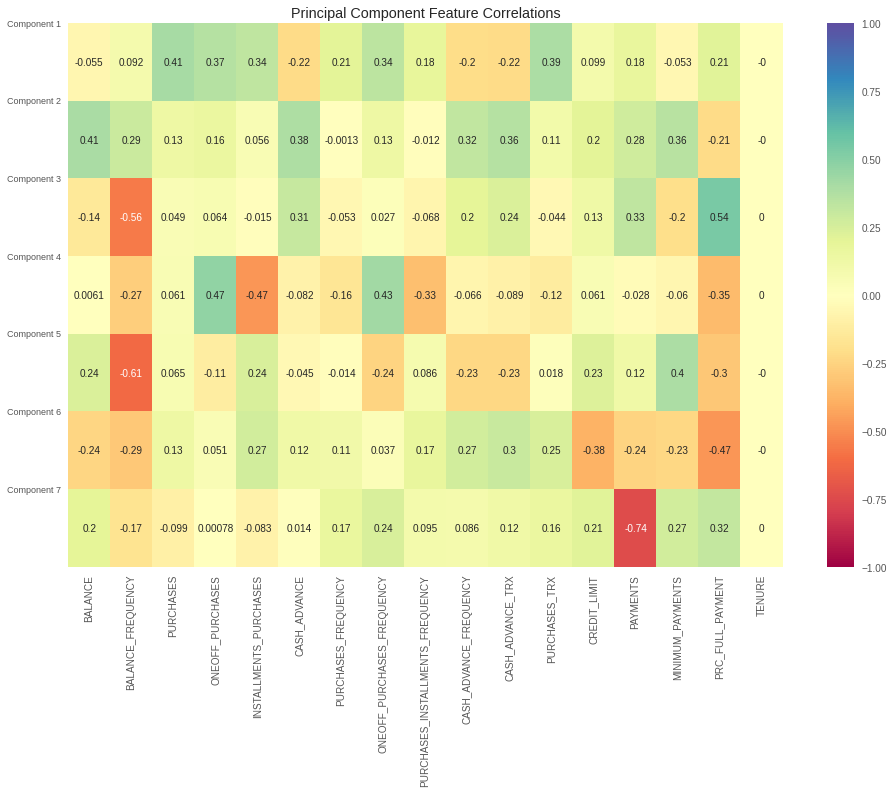

In [ ]:
#Kita dapat membuat heatmap lain untuk membuat grafik komponen:

plt.figure(figsize=(16,10))
sns.heatmap(data_pca_RB, vmin=-1, vmax=1, cmap='Spectral', annot=True)
plt.title('Principal Component Feature Correlations')
plt.yticks([0, 1, 2, 3, 4, 5, 6], ['Component 1', 'Component 2', 'Component 3', 'Component 4', 'Component 5', 'Component 6', 'Component 7'],rotation=0, fontsize=9)
plt.show()

In [ ]:
pca_RB_scores = pca.transform(RB_scaler)
pca_RB_scores

array([[-1.18761699, -2.01467401, -0.32313519, ...,  0.46487792,
         0.44917119, -0.30136241],
       [-1.57168676,  1.65857631,  1.83635461, ...,  0.34410258,
        -1.56599176, -0.69597828],
       [ 1.00537758,  0.26642914, -1.18141425, ..., -0.39780959,
        -0.63755959,  0.75710946],
       ...,
       [-0.37404667, -2.37889262,  0.43840735, ..., -0.10379447,
        -0.07451851,  0.48989556],
       [-1.30777544, -2.04145957,  0.83353476, ..., -0.58729006,
        -0.10815006,  0.3308839 ],
       [ 0.66382295, -0.68036526,  0.72648652, ..., -0.19977975,
         1.87144426,  0.90071159]])

### Standard Scaler

In [ ]:
pca_SS = pca.fit(SS_scaler)
pc_SS = ['PC'+str(n) for n in range(1, len(pca_SS.components_)+1)]
df_pca_SS = pd.DataFrame(pca_SS.transform(SS_scaler), columns=pc_SS)

In [ ]:
df_pca_SS.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,-1.637715,-2.423495,0.279856,-0.465366,0.106273,0.757831,0.219373
1,-2.215350,2.245515,0.558383,1.663545,1.549973,-0.960466,1.117995
2,1.168272,0.275078,1.572667,-2.062636,-0.227004,-0.686454,-1.291599
3,-0.523101,-0.209588,2.296522,-0.886212,1.173213,1.525564,-0.730920
4,-1.657319,-1.642660,0.250814,-1.232091,-0.293752,-0.540540,0.721793


In [ ]:
pca_SS.components_

array([[-0.04639388,  0.07990213,  0.38061513,  0.29567672,  0.33435471,
        -0.18015748,  0.37301379,  0.29026907,  0.31612952, -0.19833892,
        -0.19100169,  0.38997152,  0.1101902 ,  0.15484018, -0.03747183,
         0.16176623, -0.        ],
       [ 0.42786923,  0.21358152,  0.13352605,  0.14839529,  0.05036177,
         0.36477733, -0.01431214,  0.12657536, -0.03079627,  0.35100267,
         0.36014941,  0.09999768,  0.27175456,  0.29034618,  0.36120237,
        -0.16479838, -0.        ],
       [-0.08939534, -0.24608967,  0.15075299,  0.44859335, -0.33615562,
        -0.03628661, -0.2549351 ,  0.41274575, -0.49246048, -0.06397107,
        -0.07312582, -0.07476886,  0.17517714,  0.17392472, -0.1847375 ,
         0.07214868, -0.        ],
       [-0.24925175, -0.36019132,  0.00907105, -0.11810855,  0.15249983,
         0.302382  ,  0.0274439 , -0.13155919,  0.10872887,  0.27003399,
         0.2884988 ,  0.00093752,  0.0523158 ,  0.30156747, -0.29334513,
         0.56004268

In [ ]:
pca_SS.explained_variance_ratio_

array([0.33363329, 0.25099008, 0.09639684, 0.08104978, 0.06135597,
       0.04231202, 0.03455853])

In [ ]:
sum(pca_SS.explained_variance_ratio_)

0.9002965034840723

In [ ]:
data_pca_SS = pd.DataFrame(pca_SS.components_,
                           columns = df.columns.values,
                           index = ['Component 1', 'Component 2', 'Component 3', 'Component 4', 'Component 5', 'Component 6', 'Component 7'])
data_pca_SS

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
Component 1,-0.046394,0.079902,0.380615,0.295677,0.334355,-0.180157,0.373014,0.290269,0.316130,-0.198339,-0.191002,0.389972,0.110190,0.154840,-0.037472,0.161766,-0.0
Component 2,0.427869,0.213582,0.133526,0.148395,0.050362,0.364777,-0.014312,0.126575,-0.030796,0.351003,0.360149,0.099998,0.271755,0.290346,0.361202,-0.164798,-0.0
Component 3,-0.089395,-0.246090,0.150753,0.448593,-0.336156,-0.036287,-0.254935,0.412746,-0.492460,-0.063971,-0.073126,-0.074769,0.175177,0.173925,-0.184738,0.072149,-0.0
Component 4,-0.249252,-0.360191,0.009071,-0.118109,0.152500,0.302382,0.027444,-0.131559,0.108729,0.270034,0.288499,0.000938,0.052316,0.301567,-0.293345,0.560043,0.0
Component 5,0.231802,-0.363905,-0.030868,-0.172728,0.117227,-0.065107,-0.124522,-0.278812,0.009284,-0.337330,-0.314996,-0.122698,0.548017,0.213726,0.299071,0.090722,0.0
Component 6,-0.046383,-0.711137,0.165543,0.117641,0.182825,0.073779,-0.003606,-0.025137,0.089248,0.067119,0.088395,0.127763,-0.281676,-0.061030,0.113527,-0.528028,-0.0
Component 7,-0.030295,0.190539,0.166726,0.024301,0.148608,-0.079965,-0.258067,-0.205320,-0.138045,-0.127643,-0.125594,-0.092056,-0.560514,0.626916,0.170497,0.035896,0.0


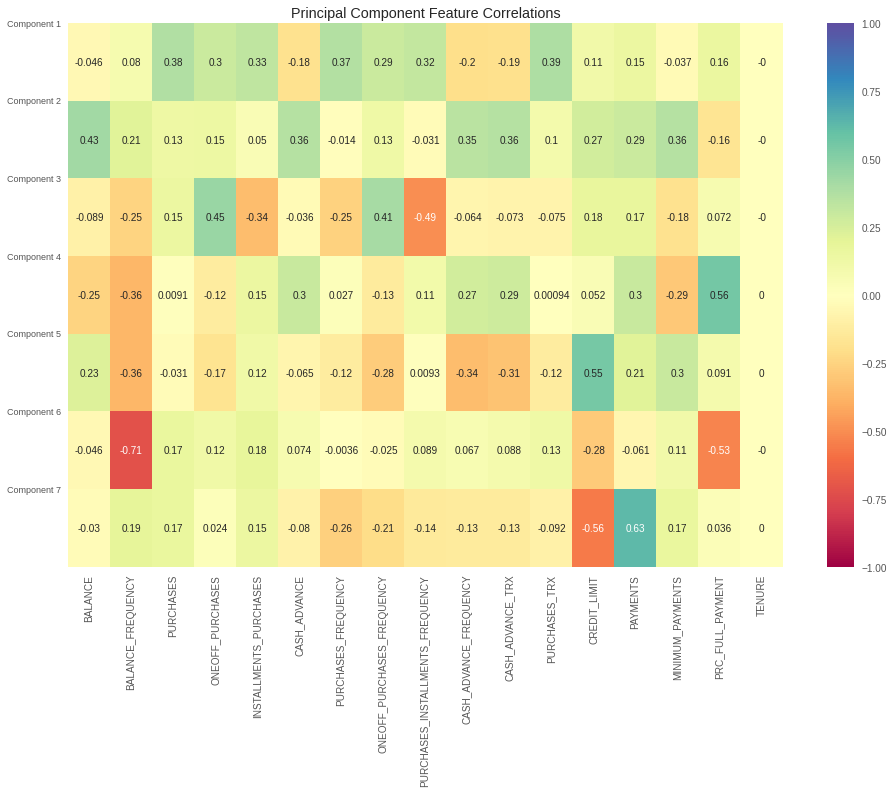

In [ ]:
#Kita dapat membuat heatmap lain untuk membuat grafik komponen:

plt.figure(figsize=(16,10))
sns.heatmap(data_pca_SS, vmin=-1, vmax=1, cmap='Spectral', annot=True)
plt.title('Principal Component Feature Correlations')
plt.yticks([0, 1, 2, 3, 4, 5, 6], ['Component 1', 'Component 2', 'Component 3', 'Component 4', 'Component 5', 'Component 6', 'Component 7'],rotation=0, fontsize=9)
plt.show()

In [ ]:
pca_SS_scores = pca.transform(SS_scaler)
pca_SS_scores

array([[-1.63771526, -2.42349497,  0.27985571, ...,  0.10627335,
         0.75783057,  0.21937316],
       [-2.21534975,  2.2455152 ,  0.55838267, ...,  1.54997262,
        -0.96046636,  1.11799503],
       [ 1.16827163,  0.27507824,  1.57266696, ..., -0.22700402,
        -0.68645391, -1.29159907],
       ...,
       [-0.1095515 , -2.79229558, -0.81729355, ..., -0.04116547,
        -0.11042234, -0.39070538],
       [-2.07577775, -2.29293367,  0.53807374, ..., -0.40237743,
        -0.23822329,  0.19174417],
       [ 0.52484345, -0.6928784 ,  2.26221021, ..., -1.90447061,
         2.0453175 , -1.16961114]])

# G. Clustering

## n-clusters (Elbow Method)

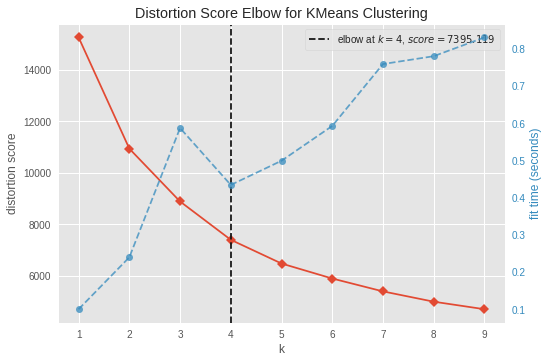

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=42)

# Elbow Method using MinMax Scaler dataframe
visualizer_MM = KElbowVisualizer(model, k=(1,10))
visualizer_MM.fit(df_pca_MM)
visualizer_MM.show()

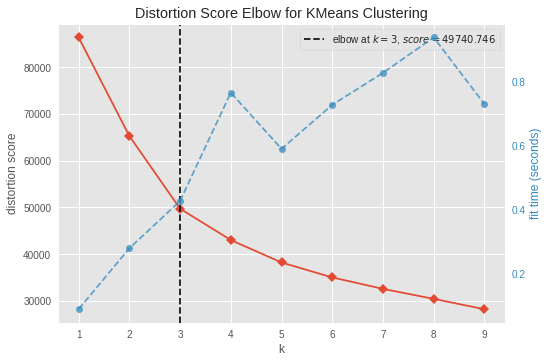

In [ ]:
# Elbow Method using RobustScaler dataframe
visualizer_RB = KElbowVisualizer(model, k=(1,10))
visualizer_RB.fit(df_pca_RB)
visualizer_RB.show()

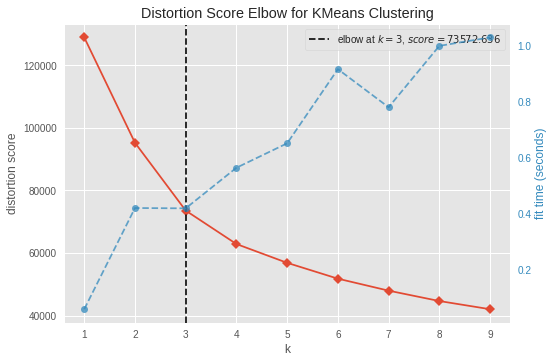

In [ ]:
# Elbow Method using StandardScaler dataframe
visualizer_SS = KElbowVisualizer(model, k=(1,10))
visualizer_SS.fit(df_pca_SS)
visualizer_SS.show()


dari hasil visualisasi diatas masing masing akan dilakukan percobaan dengan nilai k yang berbeda untuk mendapatkan hasil cluster yang optimal

## K-Means Clustering

In [ ]:
# create model Kmeans using dataframe Minmaxscaler
model_Kmeans_MM = KMeans(visualizer_MM.elbow_value_, init='k-means++', random_state=42)
labels_MM = model_Kmeans_MM.fit_predict(df_pca_MM)

In [ ]:
# create model Kmeans using dataframe Robustscaler
model_Kmeans_RB = KMeans(visualizer_RB.elbow_value_, init='k-means++', random_state=42)
labels_RB = model_Kmeans_RB.fit_predict(df_pca_RB)

In [ ]:
# create model Kmeans using dataframe Standardscaler
model_Kmeans_SS = KMeans(visualizer_SS.elbow_value_,init='k-means++', random_state=42)
labels_SS = model_Kmeans_SS.fit_predict(df_pca_SS)

In [ ]:
MM_scaler_df['LABELS'] = labels_MM
df_pca_MM['LABELS'] = labels_MM

RB_scaler_df['LABELS'] = labels_RB
df_pca_RB['LABELS'] = labels_RB

SS_scaler_df['LABELS'] = labels_SS
df_pca_SS['LABELS'] = labels_SS

## Distribution of Data

### Standard Scaler

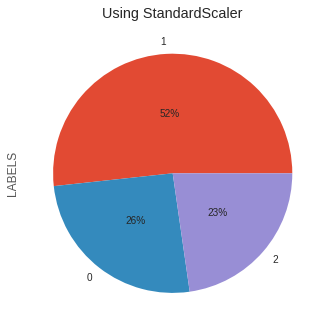

In [ ]:
df_pca_SS.LABELS.value_counts().plot.pie(autopct='%1.0f%%', pctdistance=0.5, labeldistance=1.1, title="Using StandardScaler")

### MinMax Scaler

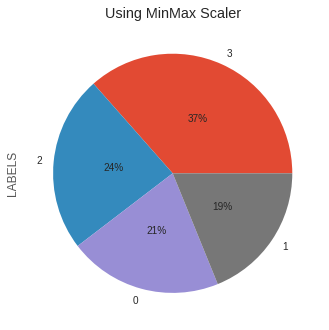

In [ ]:
df_pca_MM.LABELS.value_counts().plot.pie(autopct='%1.0f%%', pctdistance=0.5, labeldistance=1.1, 
                                         title="Using MinMax Scaler")

### Robust Scaler

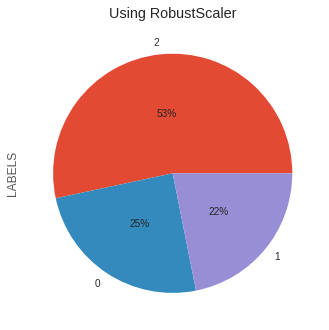

In [ ]:
df_pca_RB.LABELS.value_counts().plot.pie(autopct='%1.0f%%', pctdistance=0.5, 
                                         labeldistance=1.1, title="Using RobustScaler")

# H. Evaluation

## Scaling Data Method

* Semakin kecil nilai DaviesBouldin Index (DBI) yang diperoleh (non-negatif >= 0), maka semakin baik cluster yang diperoleh dari pengelompokan menggunakan algoritma clustering (Bates & Kalita 2016)
* Silhouette Coefficient sebuah nilai antara -1 dan 1. Semakin tinggi scorenya, semakin baik. score 1 mengindikasikan cluster yang kuat dan 0 berarti overlapping cluster.

In [ ]:
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

print("=========================MinMaxScaler============================")
print(f'Davies-Bouldin index = {davies_bouldin_score(df_pca_MM, labels_MM)}')
print(f'Silhouette Score = {silhouette_score(df_pca_MM, labels_MM)}')
print("=========================================================================\n")

print("=========================RobustScaler============================")
print(f'Davies-Bouldin index = {davies_bouldin_score(df_pca_RB, labels_RB)}')
print(f'Silhouette Score = {silhouette_score(df_pca_RB, labels_RB)}')
print("========================================================================\n")

print("=========================StandardScaler============================")
print(f'Davies-Bouldin index = {davies_bouldin_score(df_pca_SS, labels_SS)}')
print(f'Silhouette Score = {silhouette_score(df_pca_SS, labels_SS)}')
print("========================================================================\n")

=========================MinMaxScaler============================
Davies-Bouldin index = 1.0304143385395272
Silhouette Score = 0.41873204244069684

=========================RobustScaler============================
Davies-Bouldin index = 1.2114625061272928
Silhouette Score = 0.3266647576757932

=========================StandardScaler============================
Davies-Bouldin index = 1.2918887031627504
Silhouette Score = 0.2803965323709987



Dari hasil score diatas terlihat jelas bahwa melakukan fitur scaling menggunakan MinMaxScaler menghasilkan hasil cluster yang optimal, hal itu dibuktikan dengan score DBI paling rendah diantara yang lain dengan score 1.03 dimana untuk score DBI semakin mendekati nol maka semakin baik cluster tersebut. selain itu dilihat dari Silhouette Score memiliki nilai yang lebih tinggi dibanding dengan yang lain dengan nilai 0.418 / 0.42, untuk Silhouette Score semakin mendekati nilai 1 maka semakin baik pula hasil cluster yang telah terbentuk.

## PCA

In [ ]:
def plotting(data, title):
    mean = data.groupby("LABELS").mean().to_numpy()
    name_cols = data.columns[0:-1]
    lines_plot = np.linspace(start=0, stop=2 * np.pi, num=len(name_cols))
    cat = np.arange(0, len(mean))
    plt.figure(figsize=(10,10))
    plt.subplot(polar=True)
    for i in range(len(mean)):
        plt.plot(lines_plot, mean[i], label=f'class {cat[i]}')
    plt.title(f'Feature comparison ({title})', size=20)
    lines, labels = plt.thetagrids(np.degrees(lines_plot), labels=name_cols)
    plt.legend()
    plt.show()
   

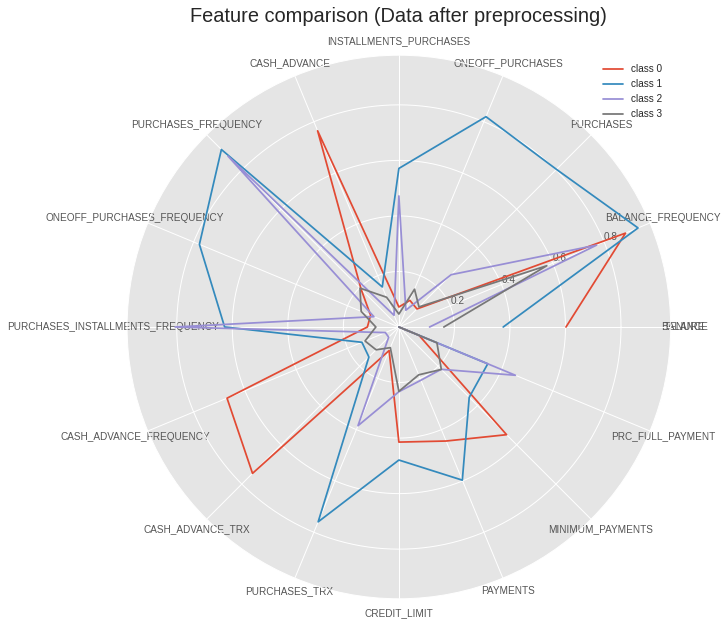

In [ ]:
plotting(MM_scaler_df, 'Data after preprocessing')

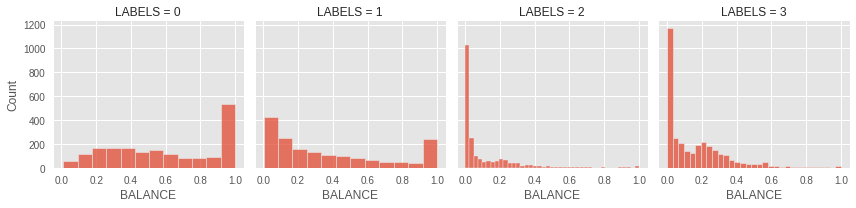

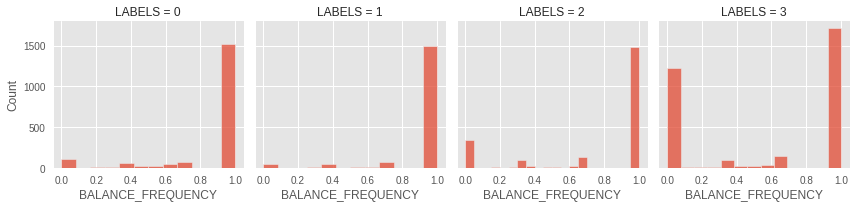

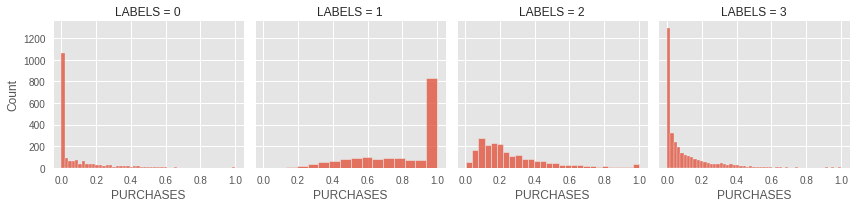

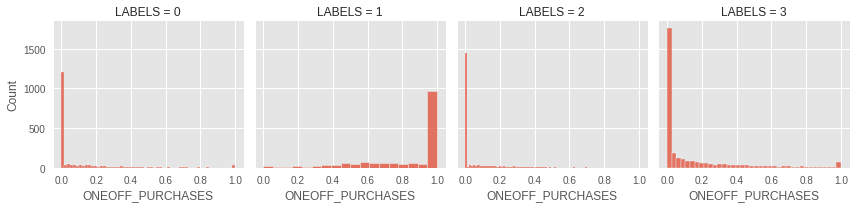

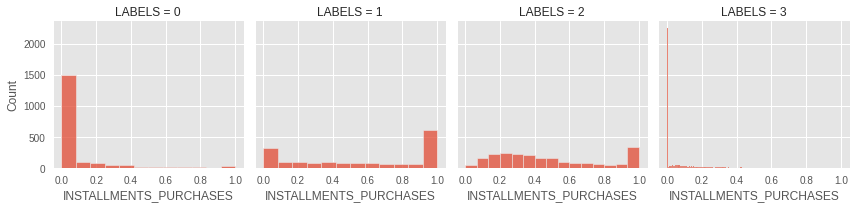

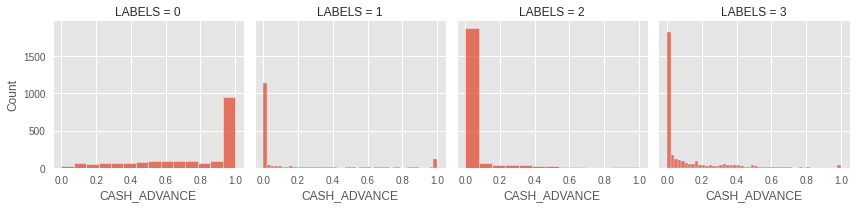

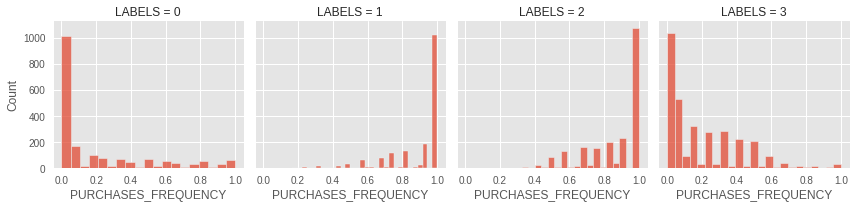

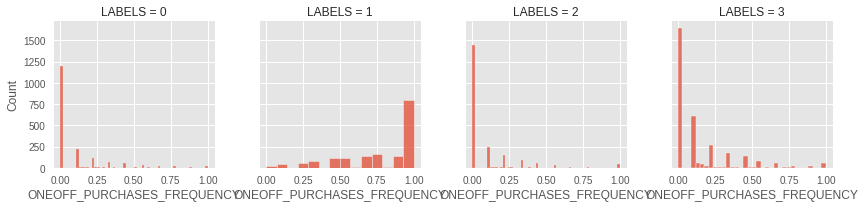

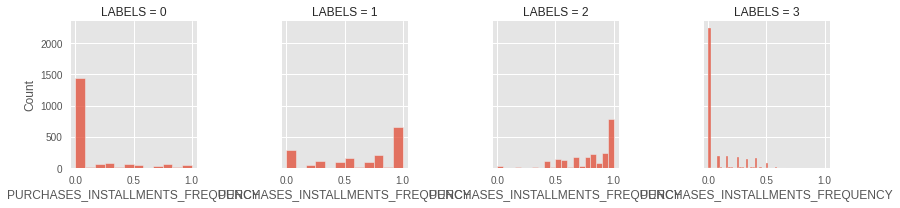

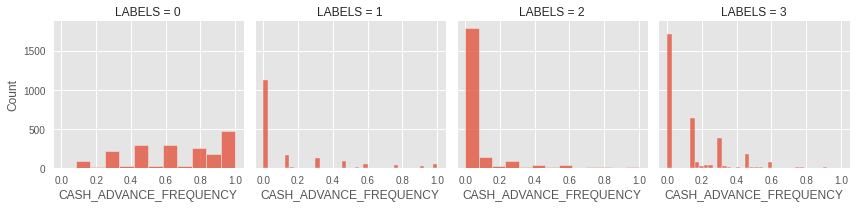

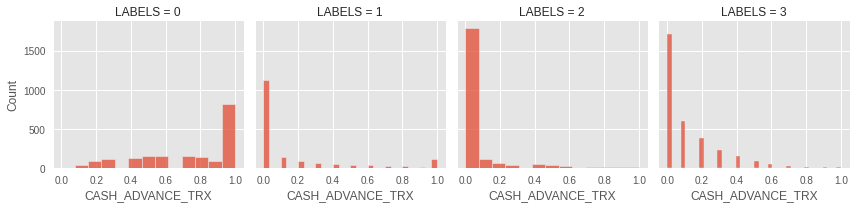

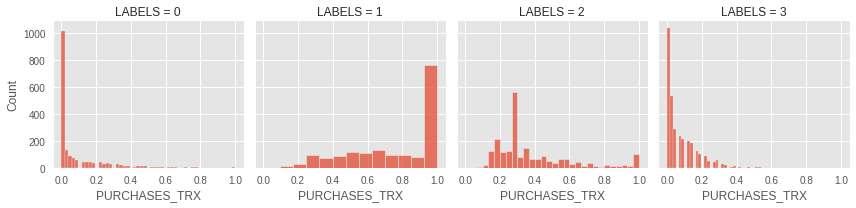

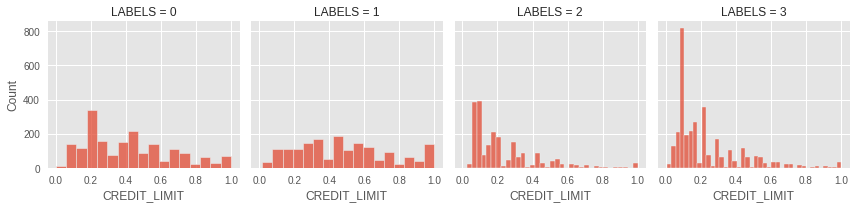

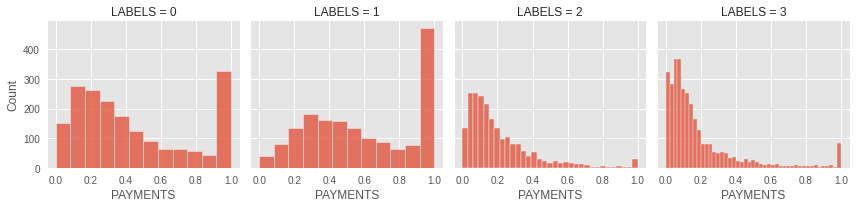

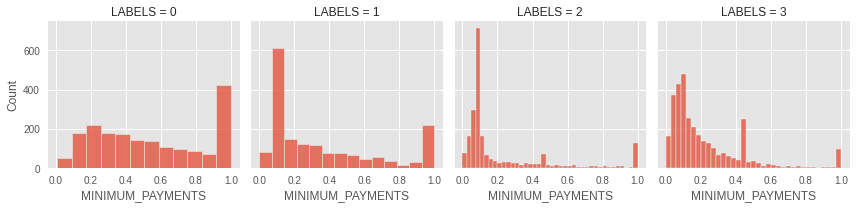

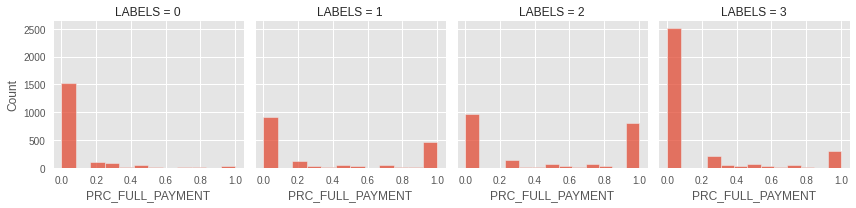

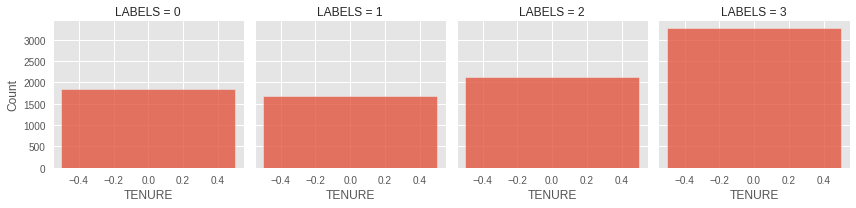

In [ ]:
for x in MM_scaler_df.drop('LABELS', axis=1).columns:
    plot = sns.FacetGrid(MM_scaler_df, col='LABELS')
    plot.map(sns.histplot, x)

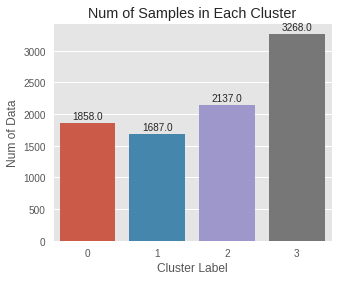

In [ ]:
x = pd.Series(MM_scaler_df.LABELS).value_counts().sort_index().reset_index()
x.columns = ['Cluster Label', 'Num of Data']
plt.figure(figsize=(5,4))
plt.title("Num of Samples in Each Cluster")
ax = sns.barplot(data=x, x='Cluster Label', y='Num of Data')
for i in ax.patches:
        ax.annotate(format(i.get_height()), (i.get_x() + i.get_width()/2.,i.get_height()),
               ha='center',va='center',xytext=(0,7), textcoords='offset points')

jumlah titik data pada cluster 0 sebesar 1858, cluster 1 sebesar 1687, cluster 2 sebesar 2137, dan cluster 3 sebesar 3268

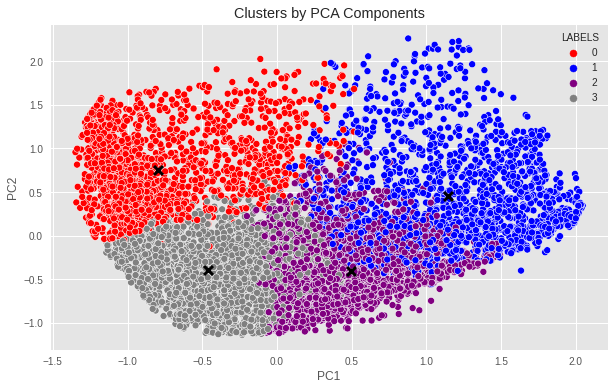

In [ ]:
x_axis = df_pca_MM['PC1']
y_axis = df_pca_MM['PC2']
plt.figure(figsize=(10,6))
sns.scatterplot(x_axis, y_axis, hue=df_pca_MM['LABELS'], palette=['red','blue','purple','grey'])
centroid = model_Kmeans_MM.cluster_centers_
plt.scatter(centroid[:, 0], centroid[:, 1],
            marker='x', s=80, linewidths=4,
            color='black', zorder=10,lw=3)
plt.title('Clusters by PCA Components')
plt.show()


## K-Means Clustering

In [ ]:
data_pca_kmeans = pd.concat([df.reset_index(drop=True), pd.DataFrame(pca_MM_scores)], axis=1)
data_pca_kmeans.columns.values[-7:] = ['Component 1', 'Component 2', 'Component 3', 'Component 4', 'Component 5', 'Component 6', 'Component 7']

data_pca_kmeans['K-Means PCA Segment'] = model_Kmeans_MM.labels_
data_pca_kmeans

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PRC_FULL_PAYMENT,TENURE,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6,Component 7,K-Means PCA Segment
0,40.900749,0.818182,95.40,0.0000,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,...,0.000000,12,-0.567426,-0.799214,0.092197,-0.193155,0.235616,0.131605,0.141062,3
1,3202.467416,0.909091,0.00,0.0000,0.00,2784.552848,0.000000,0.000000,0.000000,0.250000,...,0.222222,12,-0.863218,0.566302,0.143363,0.693987,-0.022078,-0.656108,0.028735,0
2,2495.148862,1.000000,773.17,773.1700,0.00,0.000000,1.000000,0.750000,0.000000,0.000000,...,0.000000,12,0.380546,0.131972,0.542734,-0.710332,-0.153240,0.051592,-0.557826,1
3,1666.670542,0.722223,1499.00,1443.5125,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,...,0.000000,12,-0.302466,-0.198427,0.878657,-0.142463,0.680382,0.081916,-0.088868,3
4,817.714335,1.000000,16.00,16.0000,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,...,0.000000,12,-0.585802,-0.476283,0.047954,-0.534955,-0.202541,-0.135136,0.219951,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.0000,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,...,0.357143,12,0.457517,-0.766681,-0.596481,0.239952,-0.587223,-0.166317,-0.242412,2
8946,19.183215,1.000000,300.00,0.0000,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,...,0.000000,12,0.250937,-0.420177,-0.728188,-0.420130,0.002265,0.132480,-0.126733,2
8947,23.398673,0.833333,144.40,0.0000,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,...,0.250000,12,0.132649,-0.924081,-0.324222,0.283484,-0.079592,0.065868,-0.303791,2
8948,13.457564,0.833333,0.00,0.0000,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,...,0.250000,12,-0.689804,-0.805541,0.185502,0.299692,-0.251974,-0.033383,0.021199,3


Sekarang sudah memiliki kerangka data dengan fitur asli, jumlah komponen PCA yang tetap, dan label segmennya sesuai dengan pengelompokan KMeans yang diterapkan ke jumlah grup yang tetap.

In [ ]:
#mengelompokkan berdasarkan segmen dan mendapatkan rata-rata dari semua fitur dan komponen.
data_pca_kmeans_freq = data_pca_kmeans.groupby(['K-Means PCA Segment']).mean()
data_pca_kmeans_freq

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6,Component 7
K-Means PCA Segment,,,,,,,,,,,,,,,,,,,,,
0,2974.708329,0.967621,249.898540,149.852402,84.455096,2129.743875,0.192243,0.082681,0.113410,0.372143,...,1044.445968,0.028031,12.0,-0.798509,0.747071,-0.083527,0.196754,-0.063749,0.003170,-0.028197
1,1857.481144,0.981169,2179.918404,1183.308036,669.027782,435.010554,0.903896,0.583148,0.627512,0.080030,...,682.144206,0.123727,12.0,1.144289,0.454171,0.342848,-0.057326,-0.002165,0.033300,0.022031
2,546.821301,0.936354,723.962313,94.561647,552.773210,127.255087,0.870220,0.073046,0.805598,0.029173,...,410.428493,0.162221,12.0,0.497873,-0.407881,-0.480731,0.081972,-0.022543,-0.000731,-0.056062
3,800.464940,0.882388,278.012608,212.595068,54.557780,323.049518,0.197955,0.110230,0.082871,0.073271,...,411.650884,0.052990,12.0,-0.462283,-0.392473,0.184862,-0.135873,0.052103,-0.018514,0.041318


In [ ]:
#memperoleh jumlah pengamatan serta proporsi pengamatan dalam setiap segmen

data_pca_kmeans_freq['Obs.'] = data_pca_kmeans[['K-Means PCA Segment', 'BALANCE']].groupby(['K-Means PCA Segment']).count()
data_pca_kmeans_freq['Obs. Prop.'] = data_pca_kmeans_freq['Obs.'] / data_pca_kmeans_freq['Obs.'].sum()
data_pca_kmeans_freq = data_pca_kmeans_freq.rename({0:'Middle Ground', 1:'High Cash Advance Users', 2:'Frugal Credit Users', 3:'High Credit Frequent Purchasers'})
data_pca_kmeans_freq

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,TENURE,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6,Component 7,Obs.,Obs. Prop.
K-Means PCA Segment,,,,,,,,,,,,,,,,,,,,,
Middle Ground,2974.708329,0.967621,249.898540,149.852402,84.455096,2129.743875,0.192243,0.082681,0.113410,0.372143,...,12.0,-0.798509,0.747071,-0.083527,0.196754,-0.063749,0.003170,-0.028197,1858,0.207598
High Cash Advance Users,1857.481144,0.981169,2179.918404,1183.308036,669.027782,435.010554,0.903896,0.583148,0.627512,0.080030,...,12.0,1.144289,0.454171,0.342848,-0.057326,-0.002165,0.033300,0.022031,1687,0.188492
Frugal Credit Users,546.821301,0.936354,723.962313,94.561647,552.773210,127.255087,0.870220,0.073046,0.805598,0.029173,...,12.0,0.497873,-0.407881,-0.480731,0.081972,-0.022543,-0.000731,-0.056062,2137,0.238771
High Credit Frequent Purchasers,800.464940,0.882388,278.012608,212.595068,54.557780,323.049518,0.197955,0.110230,0.082871,0.073271,...,12.0,-0.462283,-0.392473,0.184862,-0.135873,0.052103,-0.018514,0.041318,3268,0.365140


>note: 

obs. itu observations

prob. itu proportion

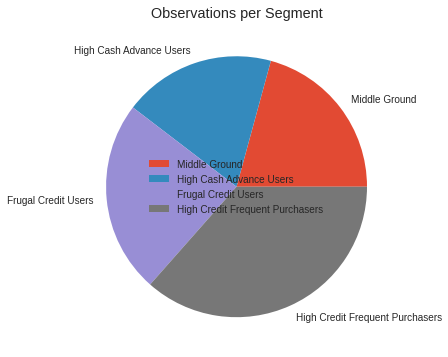

In [ ]:
data_pca_kmeans_freq.plot.pie(y='Obs.', figsize=(6, 6))
plt.legend(loc='center')
plt.ylabel(None)
plt.title('Observations per Segment')
plt.show()

In [ ]:
data_pca_kmeans['Legend'] = data_pca_kmeans['K-Means PCA Segment'].map({0:'Middle Ground', 1:'High Cash Advance Users', 2:'Frugal Credit Users', 3:'High Credit Frequent Purchasers'})

In [ ]:
pred_data_pca_kmeans = data_pca_kmeans.copy()

In [ ]:
pred_data_pca_kmeans.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'Component 1', 'Component 2', 'Component 3', 'Component 4',
       'Component 5', 'Component 6', 'Component 7', 'K-Means PCA Segment',
       'Legend'],
      dtype='object')

In [ ]:
pred_data_pca_kmeans.drop(columns=['Component 1', 'Component 2', 'Component 3', 'Component 4',
       'Component 5', 'Component 6', 'Component 7', 'K-Means PCA Segment',
       'Legend'], inplace=True)

In [ ]:
pred_data_pca_kmeans

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.0000,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.0000,0.00,2784.552848,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.1700,0.00,0.000000,1.000000,0.750000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.722223,1499.00,1443.5125,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.0000,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.0000,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.357143,12
8946,19.183215,1.000000,300.00,0.0000,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,12
8947,23.398673,0.833333,144.40,0.0000,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,12
8948,13.457564,0.833333,0.00,0.0000,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,12


## Save model to pickle

In [ ]:
import pickle
model_Kmeans_MM.fit(df_pca_MM)
pickle.dump(model_Kmeans_MM, open('./cc_cluster_model.pkl','wb'))

#I. Summary

>Reason:

Menggunakan PCA dengan K-Means membutuhkan 7 komponen PCA untuk menangkap setidaknya 90% dari varians data.

>Objektif:

Memperhatikan beberapa kelompok memiliki nilai yang sangat berbeda untuk penggunaan uang muka, yang terkait dengan frekuensi penggunaan kartu kredit. Berdasarkan hal itu lah kami membagi menjadi 4 label atau 4 kelas yaitu Middle Ground, High Cash Advance User, High Credit Frequent Purchase, Frugal Credit Users. 

In [ ]:
data_freq = data_pca_kmeans_freq.copy()
data_freq

In [ ]:
data_freq.drop(columns=['Component 1', 'Component 2', 'Component 3', 'Component 4',
       'Component 5', 'Component 6', 'Component 7', 'Obs.',
       'Obs. Prop.'], inplace=True)
data_freq

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
K-Means PCA Segment,,,,,,,,,,,,,,,,,
Middle Ground,2974.708329,0.967621,249.898540,149.852402,84.455096,2129.743875,0.192243,0.082681,0.113410,0.372143,7.453714,3.761572,5769.898392,1856.949694,1044.445968,0.028031,12.0
High Cash Advance Users,1857.481144,0.981169,2179.918404,1183.308036,669.027782,435.010554,0.903896,0.583148,0.627512,0.080030,1.526378,31.139893,6661.915719,2494.199076,682.144206,0.123727,12.0
Frugal Credit Users,546.821301,0.936354,723.962313,94.561647,552.773210,127.255087,0.870220,0.073046,0.805598,0.029173,0.520356,15.779598,3266.116594,866.603647,410.428493,0.162221,12.0
High Credit Frequent Purchasers,800.464940,0.882388,278.012608,212.595068,54.557780,323.049518,0.197955,0.110230,0.082871,0.073271,1.160649,3.301714,3247.845284,779.236508,411.650884,0.052990,12.0


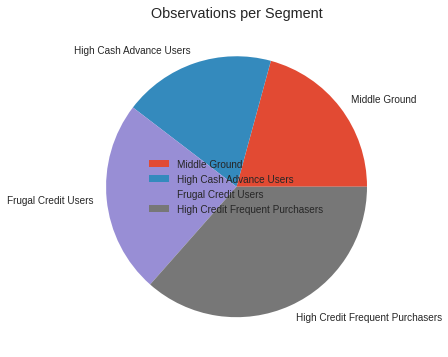

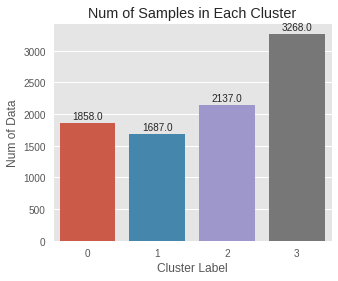


- **Cluster 0 (Merah)** : Middle Ground

Memiliki balance dan limit kartu kredit paling tinggi, lebih sering melakukan pembelian dengan metode sekali bayar(one off purchases), sering melakukan transaksi belanja, hampir tidak pernah melakukan pembelian dengan uang tunai dimuka.Memiliki limit kartu kredit moderat.

- **cluster 1 (Biru)** : High Cash Advance Users

Tipe user yang memiliki balance tinggi dan sering melakukan transaksi pembelian. Jumlah transaksi dengan uang tunai dimuka, hampir sama dengan melakukan pembelian metode mencicil. Memiliki limit kartu kredit paling tinggi.

- **cluster 2 (Ungu)** : Frugal Credit Users

Memiliki balance paling rendah diantara cluster lain, frekuensi pembelian cukup tinggi dan sering melakukan pembelian dengan metode pembayaran mencicil, memiliki limit kartu kredit paling rendah.

- **cluster 3 (Abu)** : High Credit Frequent Purchasers

Tipe user yang memiliki balance moderat, sangat jarang melakukan transaksi pembelian, lebih sering melakukan transaksi dengan uang tunai dimuka, hampir tidak pernah melakukan pembelian dengan metode mencicil. tipe user ini memiliki limit kartu kredit medium.